In [113]:
"""This dataset is an invaluable asset in the realm of Health Care, providing a structured foundation for the development of cancer detection models. 
This dataset exemplifies the variety of symptoms of Lung Cancer. 
Each category within the dataset—'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',
'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'—has been carefully curated to 
encompass a diverse range of symptoms, ensuring that the resulting models are versatile and accurate. 

This scientific approach not only enhances the dataset's diversity to record symptoms of lung cancer but also contributes to the 
broader field of AI-driven health technologies, pushing the boundaries of what health care assistants can achieve."""

"This dataset is an invaluable asset in the realm of Health Care, providing a structured foundation for the development of cancer detection models. \nThis dataset exemplifies the variety of symptoms of Lung Cancer. \nEach category within the dataset—'GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE',\n'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'—has been carefully curated to \nencompass a diverse range of symptoms, ensuring that the resulting models are versatile and accurate. \n\nThis scientific approach not only enhances the dataset's diversity to record symptoms of lung cancer but also contributes to the \nbroader field of AI-driven health technologies, pushing the boundaries of what health care assistants can achieve."

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df=pd.read_json("C:/Users/Leonardo Barrera/OneDrive/Projects Data Science/dataset.json/dataset.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,3000.0,55.169000,14.723746,30.0,42.0,55.0,68.0,80.0
SMOKING,3000.0,1.491000,0.500002,1.0,1.0,1.0,2.0,2.0
YELLOW_FINGERS,3000.0,1.514000,0.499887,1.0,1.0,2.0,2.0,2.0
ANXIETY,3000.0,1.494000,0.500047,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,3000.0,1.499000,0.500082,1.0,1.0,1.0,2.0,2.0
CHRONIC_DISEASE,3000.0,1.509667,0.499990,1.0,1.0,2.0,2.0,2.0
FATIGUE,3000.0,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALLERGY,3000.0,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
WHEEZING,3000.0,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0
ALCOHOL_CONSUMING,3000.0,1.491333,0.500008,1.0,1.0,1.0,2.0,2.0


In [94]:
# Counting the number of duplicates
num_duplicates=df.duplicated().sum()
print(f'Number of duplicate records: {num_duplicates}')

Number of duplicate records: 2


In [95]:
#Handling duplicates
print(f'Lengh before dropping duplicates: {len(df)}')
df2=df.drop_duplicates()
print(f'Lengh after dropping duplicates: {len(df2)}')

Lengh before dropping duplicates: 3000
Lengh after dropping duplicates: 2998


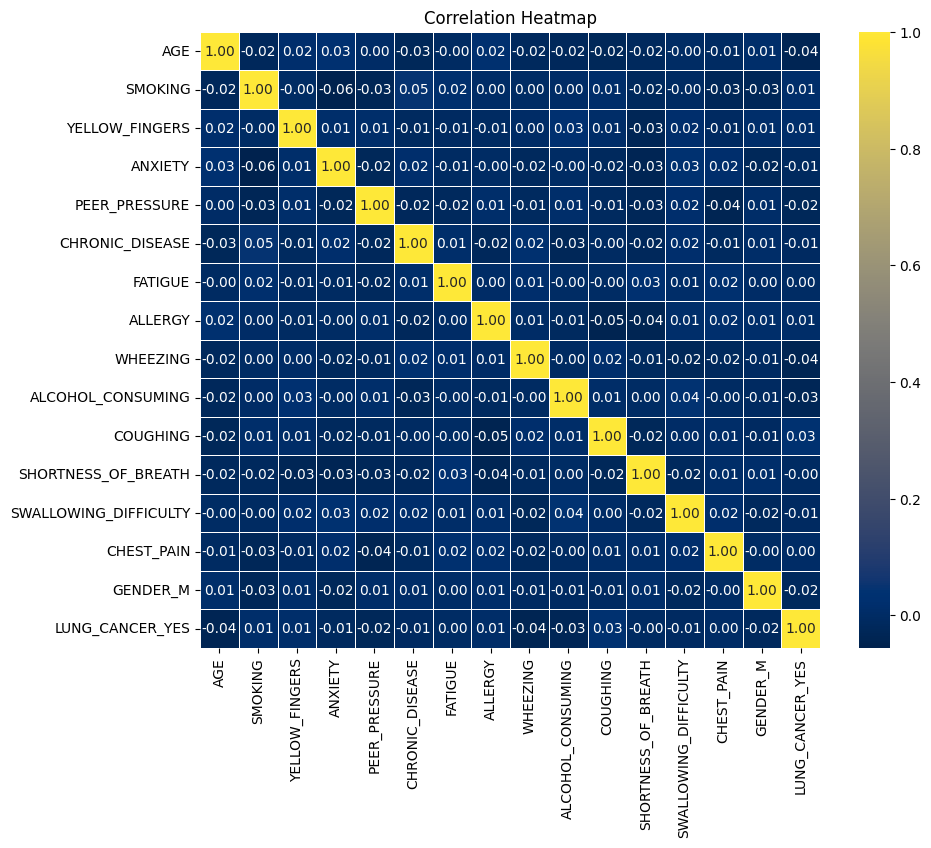

In [96]:
#Convert categorical data to numerical 

df_encoded=pd.get_dummies(df2, drop_first=True)

#Calculate correlation matrix
corr_matrix=df_encoded.corr()

#Create the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,  annot=True, cmap="cividis", fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


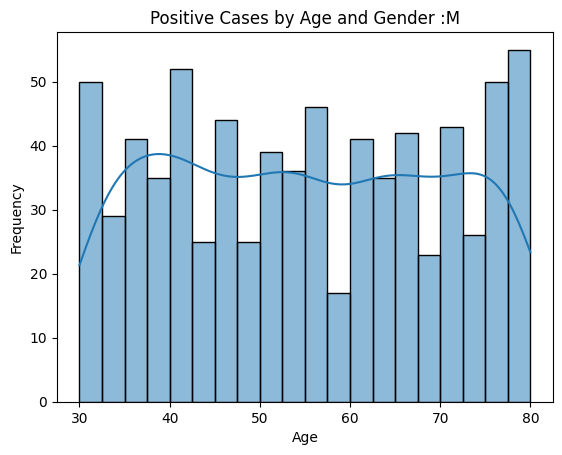

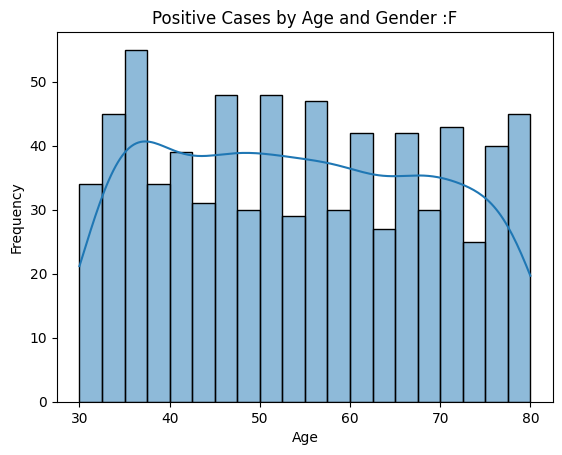

In [97]:
#Positive cases by Gender
for x in df["GENDER"].unique():
    plt.figure()
    sns.histplot(df.loc[(df["GENDER"]==x) & (df["LUNG_CANCER"]=="YES")]["AGE"], kde=True, bins=20)
    plt.title(f'Positive Cases by Age and Gender :{x}')
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()


GENDER
F    51.413190
M    49.801849
Name: count, dtype: float64


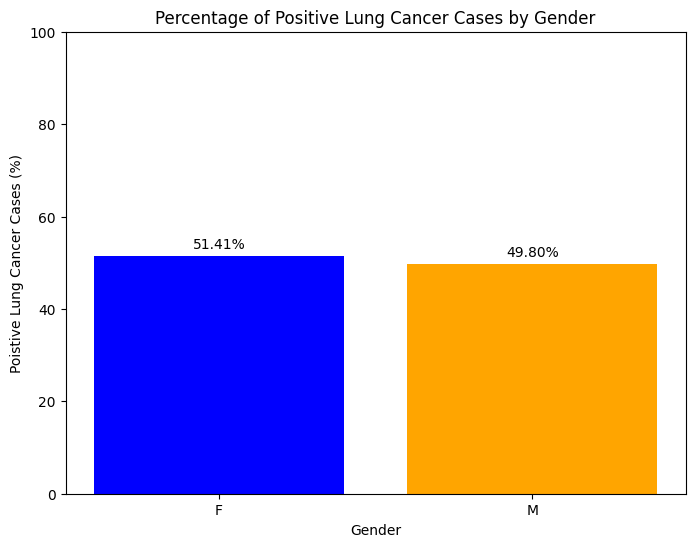

In [98]:
#Calculate the percentage of positive lung cancer for each gender
positive_counts=df[df["LUNG_CANCER"]=="YES"]["GENDER"].value_counts()
total_counts=df["GENDER"].value_counts()
positive_percent=(positive_counts/total_counts)*100

print(positive_percent)

#Plot Bar Chart
plt.figure(figsize=(8,6))

bars=plt.bar(positive_percent.index, positive_percent.values, color=["blue", "orange"])

#Add labels
for bar in bars:
    yval=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval +1, f'{yval:.2f}%', ha="center", va="bottom")

plt.title("Percentage of Positive Lung Cancer Cases by Gender")
plt.xlabel("Gender")
plt.ylabel("Poistive Lung Cancer Cases (%)")
plt.ylim(0,100)

plt.show()



-0.10495633491958554 56.47284215533635 -0.23176602848036246 0.10174014068123213 0.06293202448688098


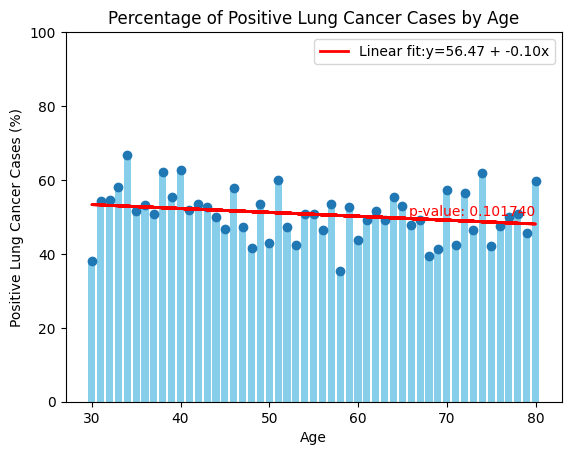

There is a HIGH p-value (>0.05), so we can conclude that the independent variable does not impact the dependent variable


In [99]:
from scipy.stats import linregress

#Calculate the percentage of positive lung cancer cases by age
positive_counts=df[df["LUNG_CANCER"]=="YES"]["AGE"].value_counts()
total_counts=df["AGE"].value_counts()
positive_percent=(positive_counts/total_counts)*100

#Sort by age
positive_percent=positive_percent.sort_values()


#Plot bar chart
plt.bar(positive_percent.index, positive_percent.values, color="skyblue")


#linear regression
x=positive_percent.index.values
y=positive_percent.values

slope, intercept, r_value, p_value, std_err=linregress(x,y)
y_fit=intercept + (slope*x)

#plot linear regression line
plt.plot(x, y_fit, color="red", linewidth=2, label=f'Linear fit:y={intercept:.2f} + {slope:.2f}x')

#add p-value to the plot
plt.text(max(x), max(y_fit), f"p-value: {p_value:.6f}", ha="right", va="top", color="red")

#add title and labels
plt.title("Percentage of Positive Lung Cancer Cases by Age")
plt.xlabel("Age")
plt.ylabel("Positive Lung Cancer Cases (%)")
plt.ylim(0,100)
plt.legend()


plt.scatter(x,y)


print(slope, intercept, r_value, p_value, std_err)
plt.show()

#Conclusion
print("There is a HIGH p-value (>0.05), so we can conclude that the independent variable does not impact the dependent variable")


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#Converting categorical variables into numercial variables
df["GENDER"]=df["GENDER"].replace({"M":0, "F":1})
df["LUNG_CANCER"]=df["LUNG_CANCER"].replace({"NO":0, "YES":1})

#Creating Predictor and Target Variables
X=df.drop("LUNG_CANCER", axis=1)
y=df["LUNG_CANCER"]

#Split data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)


#Scaling Data
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Instantiating Models
lr=LogisticRegression()
knn=KNeighborsClassifier()
gbt=GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=3)

classifiers=[("Logistic Regression",lr),("K Nearest Neighbors",knn), ("Gradient Boosting Classfier",gbt)]

#Training the methods by separate

for clf_name, clf in classifiers:
    clf.fit(X_train_scaled,y_train)
    y_pred=clf.predict(X_test_scaled)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{clf_name} accuracy is {accuracy:.2f}")

#Training the Ensemble Model

vc=VotingClassifier(estimators=classifiers)
vc.fit(X_train_scaled,y_train)

#Predicting and evaluating accuracy of Ensemble Model
y_predict=vc.predict(X_test)
accuracy_score=accuracy_score(y_test,y_predict)
print(f"Accuracy Score of the Ensemble Model: {accuracy_score:.2f}")


Logistic Regression accuracy is 0.52
K Nearest Neighbors accuracy is 0.53
Gradient Boosting Classfier accuracy is 0.53
Accuracy Score of the Ensemble Model: 0.50


C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Leonardo Barrera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [111]:
#Printing the model predictions vs the y_test values in a DataFrame

df_final=pd.DataFrame({"y_test_values":y_test, "y_model_predictions":y_predict})
df_final["diff"]=df_final["y_test_values"]-df_final["y_model_predictions"]
print(df_final["diff"].sum())




298
